In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
data = pd.merge(transactions, customers, on='CustomerID', how='left')

In [4]:
customer_profile = data.groupby('CustomerID').agg({
    'Quantity': 'sum', 
    'TotalValue': 'sum',
    'Region': 'first'   
}).reset_index()

In [5]:
customer_profile['Region'] = customer_profile['Region'].astype('category').cat.codes

In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_profile[['Quantity', 'TotalValue', 'Region']])

In [7]:
best_db_index = float('inf')  # to store the best DB Index value
best_k = None  # to store the best number of clusters
results = []

In [8]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    customer_profile['Cluster'] = kmeans.fit_predict(scaled_data)

In [10]:
db_index = davies_bouldin_score(scaled_data, customer_profile['Cluster'])

In [11]:
  results.append((k, db_index))

In [12]:
 if db_index < best_db_index:
        best_db_index = db_index
        best_k = k

In [13]:
for k, db_index in results:
    print(f'Number of Clusters: {k}, Davies-Bouldin Index: {db_index:.4f}')

print(f"\nOptimal number of clusters: {best_k} with Davies-Bouldin Index: {best_db_index:.4f}")

Number of Clusters: 10, Davies-Bouldin Index: 0.9019

Optimal number of clusters: 10 with Davies-Bouldin Index: 0.9019


In [14]:
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
customer_profile['Cluster'] = kmeans_final.fit_predict(scaled_data)

In [15]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
customer_profile['PCA1'] = pca_result[:, 0]
customer_profile['PCA2'] = pca_result[:, 1]

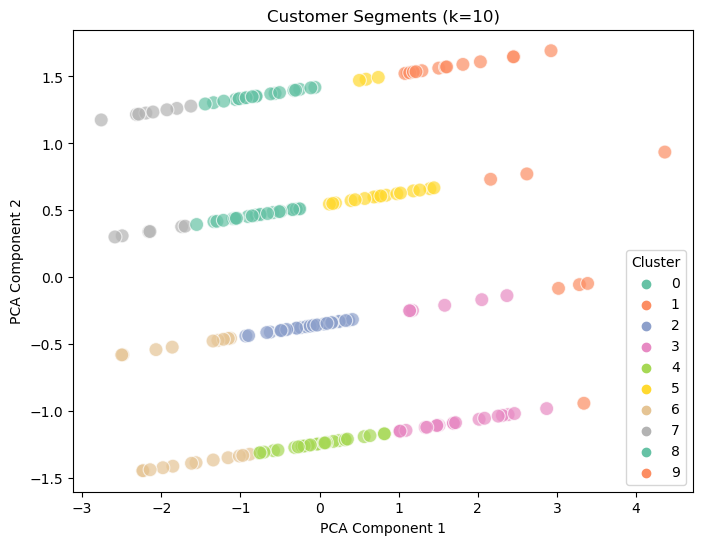

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set2', data=customer_profile, s=100, alpha=0.7)
plt.title(f'Customer Segments (k={best_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [17]:
customer_profile[['CustomerID', 'Cluster']].to_csv('Customer_Clustering_Results.csv', index=False)
print("\nClustering results saved as 'Customer_Clustering_Results.csv'.")


Clustering results saved as 'Customer_Clustering_Results.csv'.
